**Student ID :** 46339868

**Name :** Abhishek Kumar Singh

**Github Repository URL :** https://github.com/MQCOMP6200/portfolio-s1-2021-abhishek8897

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import warnings
warnings.simplefilter('ignore')

# Reading Training and Testing Datasets

In [118]:
test = pd.read_csv('C:/Users/Abhishek/Portfolio-2/testing.csv')
test.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [119]:
train = pd.read_csv('C:/Users/Abhishek/Portfolio-2/training.csv')
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [120]:
train.shape

(14803, 32)

In [121]:
test.shape

(4932, 32)

In [122]:
frames = [test,train]
result=pd.concat(frames)
result.reset_index(level=0, inplace=True)
result.shape

(19735, 33)

In [123]:
result.head()

,index,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [124]:
result['Dates'] = pd.to_datetime(result['date']).dt.date
result['Time'] = pd.to_datetime(result['date']).dt.time
result

,index,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,Dates,Time
0,0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,6.000000,51.500000,5.000000,45.410389,45.410389,63000,Weekday,Monday,2016-01-11,17:30:00
1,1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,...,5.000000,40.000000,4.700000,47.233763,47.233763,64800,Weekday,Monday,2016-01-11,18:00:00
2,2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.790000,44.900000,...,5.666667,40.000000,4.633333,10.298729,10.298729,67200,Weekday,Monday,2016-01-11,18:40:00
3,3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,...,5.833333,40.000000,4.616667,8.827838,8.827838,67800,Weekday,Monday,2016-01-11,18:50:00
4,4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.100000,48.466667,...,6.000000,40.000000,4.350000,24.884962,24.884962,70200,Weekday,Monday,2016-01-11,19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,14798,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,...,3.000000,22.000000,13.400000,18.248201,18.248201,61200,Weekday,Friday,2016-05-27,17:00:00
19731,14799,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,...,3.166667,22.833333,13.366667,16.966162,16.966162,61800,Weekday,Friday,2016-05-27,17:10:00
19732,14800,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,...,3.500000,24.500000,13.300000,49.282940,49.282940,63000,Weekday,Friday,2016-05-27,17:30:00
19733,14801,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,...,3.833333,26.166667,13.233333,6.322784,6.322784,64200,Weekday,Friday,2016-05-27,17:50:00


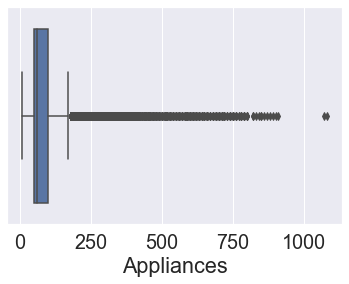

In [125]:
ax = sns.boxplot(x="Appliances", data=result)
plt.rcParams["figure.figsize"] = (12,6)

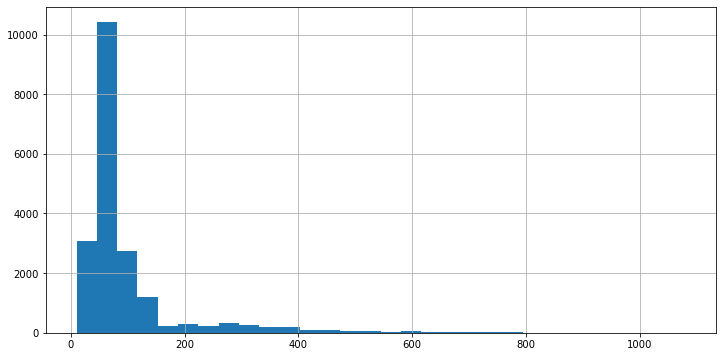

In [10]:
result['Appliances'].hist(histtype = 'stepfilled', bins = 30)
plt.rcParams["figure.figsize"] = (12,6)

In [126]:
Graph3 = result[['date','Appliances']]
Graph3.head()

,date,Appliances
0,2016-01-11 17:30:00,50
1,2016-01-11 18:00:00,60
2,2016-01-11 18:40:00,230
3,2016-01-11 18:50:00,580
4,2016-01-11 19:30:00,100


In [127]:
result.head()

,index,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,Dates,Time
0,0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,...,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday,2016-01-11,17:30:00
1,1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,...,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday,2016-01-11,18:00:00
2,2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,...,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday,2016-01-11,18:40:00
3,3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,...,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday,2016-01-11,18:50:00
4,4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,...,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday,2016-01-11,19:30:00


In [128]:
Graph3['date'] = pd.to_datetime(Graph3['date'])
Graph3.index = Graph3['date']
Graph3= Graph3.drop('date', 1)

In [129]:
Graph_3= Graph3[(Graph3.index > '2016-01-10') & (Graph3.index <= '2016-01-18 12:00:00')]

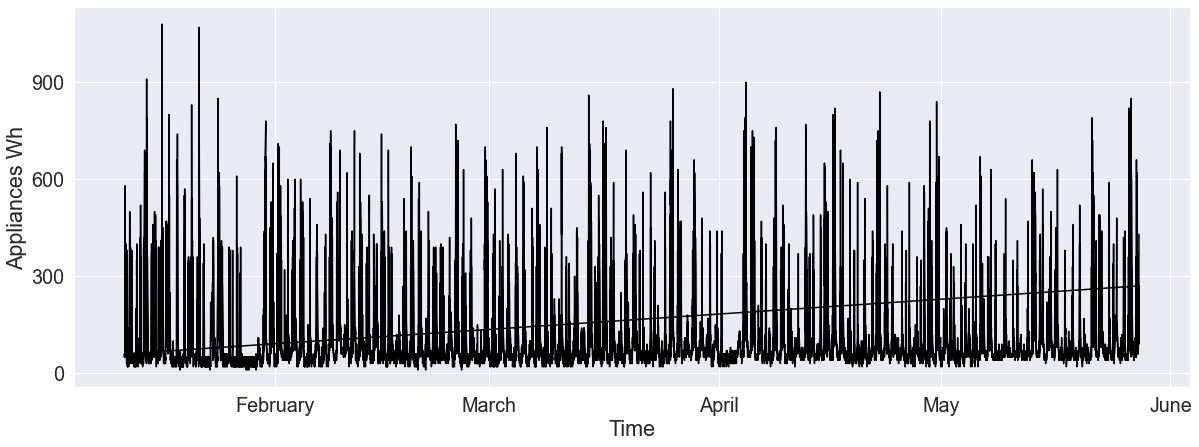

In [130]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(Graph3.index, Graph3['Appliances'], color='black')
plt.yticks(np.arange(0, 1000, 300))
m = mdates.DateFormatter("%B")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(m)
plt.ylabel('Appliances Wh')
plt.xlabel('Time')
plt.show()

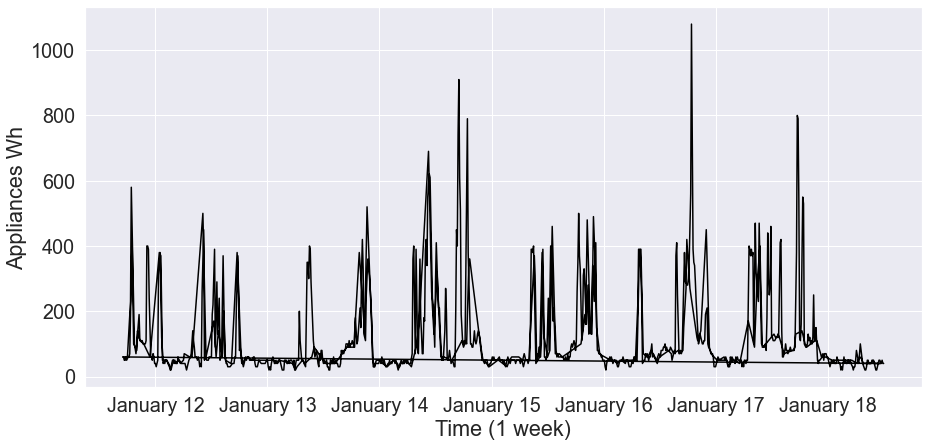

In [131]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(Graph_3.index, Graph_3['Appliances'], color='black')
m = mdates.DateFormatter("%B %d")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(m)
plt.ylabel('Appliances Wh')
plt.xlabel('Time (1 week)')
plt.show()

In [132]:
weekstatus = result['WeekStatus']
set (weekstatus)

{'Weekday', 'Weekend'}

In [133]:
weekstatus_df = pd.get_dummies(result['WeekStatus'])
weekstatus_df

,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
19730,1,0
19731,1,0
19732,1,0
19733,1,0


## Setting day of week

In [22]:
Day_of_week = result['Day_of_week']
set(Day_of_week)


{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [23]:
day_df = pd.get_dummies(result['Day_of_week'])
day_df

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
14798,1,0,0,0,0,0,0
14799,1,0,0,0,0,0,0
14800,1,0,0,0,0,0,0
14801,1,0,0,0,0,0,0


## Setting Month column with respect to it's month name


In [24]:
result['Month'] = pd.to_datetime(result['date']).dt.month
result.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week', 'Dates', 'Time', 'Month'],
      dtype='object')

In [25]:
result['Month'] = pd.to_datetime(result['Month'], format='%m').dt.month_name().str.slice(stop=3)
result

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,Dates,Time,Month
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.89,...,51.500000,5.000000,45.410389,45.410389,63000,Weekday,Monday,2016-01-11,17:30:00,Jan
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.89,...,40.000000,4.700000,47.233763,47.233763,64800,Weekday,Monday,2016-01-11,18:00:00,Jan
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.790000,44.900000,18.89,...,40.000000,4.633333,10.298729,10.298729,67200,Weekday,Monday,2016-01-11,18:40:00,Jan
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.00,...,40.000000,4.616667,8.827838,8.827838,67800,Weekday,Monday,2016-01-11,18:50:00,Jan
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.100000,48.466667,19.00,...,40.000000,4.350000,24.884962,24.884962,70200,Weekday,Monday,2016-01-11,19:30:00,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.70,...,22.000000,13.400000,18.248201,18.248201,61200,Weekday,Friday,2016-05-27,17:00:00,May
14799,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.70,...,22.833333,13.366667,16.966162,16.966162,61800,Weekday,Friday,2016-05-27,17:10:00,May
14800,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,...,24.500000,13.300000,49.282940,49.282940,63000,Weekday,Friday,2016-05-27,17:30:00,May
14801,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.70,...,26.166667,13.233333,6.322784,6.322784,64200,Weekday,Friday,2016-05-27,17:50:00,May


In [26]:
result['Month']

0        Jan
1        Jan
2        Jan
3        Jan
4        Jan
        ... 
14798    May
14799    May
14800    May
14801    May
14802    May
Name: Month, Length: 19735, dtype: object

In [27]:
test = pd.read_csv('C:/Users/Abhishek/Portfolio-2/testing.csv', index_col='date', parse_dates=True)
test.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [28]:
test_dataset1 =pd.DataFrame({'Appliances': train['Appliances'], 'lights': train['lights'], 
                             'T1': train['T1'], 'RH_1': train['RH_1'], 
                             'T2': train['T2'], 'RH_2': train['RH_2'], 
                             'T3': train['T3'], 'RH_3': train['RH_3']})

In [29]:
test_dataset1

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333
3,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000
4,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333
...,...,...,...,...,...,...,...,...
14798,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000
14799,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000
14800,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333
14801,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000


In [30]:
test_dataset1.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
Appliances,1.000000,0.194689,0.060137,0.087276,0.124719,-0.061108,0.093336,0.036765
lights,0.194689,1.000000,-0.028300,0.112602,-0.011521,0.059335,-0.099009,0.135162
T1,0.060137,-0.028300,1.000000,0.166716,0.837948,0.000574,0.892645,-0.026293
RH_1,0.087276,0.112602,0.166716,1.000000,0.273212,0.798149,0.257264,0.845261
T2,0.124719,-0.011521,0.837948,0.273212,1.000000,-0.160643,0.736325,0.123498
RH_2,-0.061108,0.059335,0.000574,0.798149,-0.160643,1.000000,0.141735,0.680792
T3,0.093336,-0.099009,0.892645,0.257264,0.736325,0.141735,1.000000,-0.007733
RH_3,0.036765,0.135162,-0.026293,0.845261,0.123498,0.680792,-0.007733,1.000000


In [31]:
def correlation(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    label = str(round(coef,2))
    
    # Add label to plot
    axis = plt.gca()
    axis.annotate(label, xy = (0.20, 0.50), size = 50, xycoords = axis.transAxes)

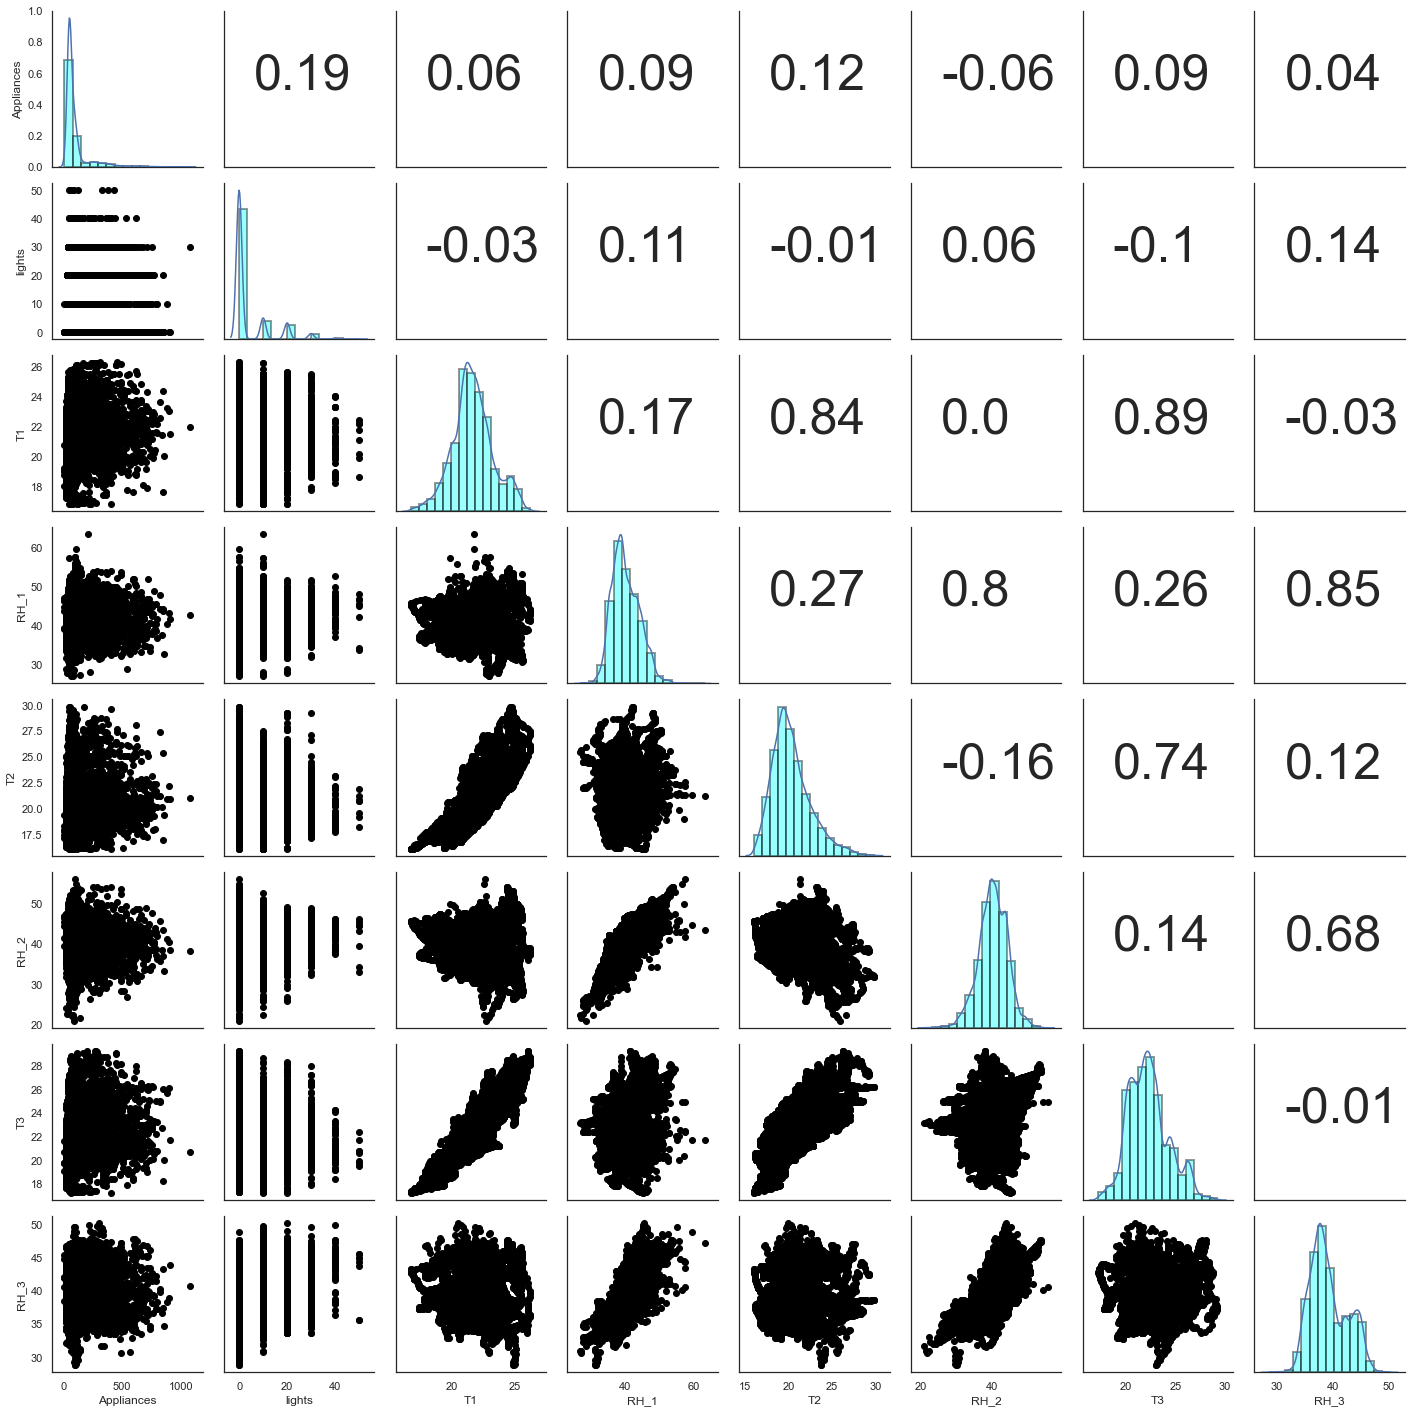

In [32]:
sns.set(style="white")
g = sns.PairGrid(test_dataset1, diag_sharey=False)
g = g.map_diag(sns.distplot, bins=15, hist=True,hist_kws={"linewidth": 2,"edgecolor":'black', "color" :'cyan'})
g = g.map_lower(plt.scatter,color = 'black')
g = g.map_upper(correlation)

In [33]:
#secondpairsplot_train_set_Jan29
test_dataset2 =pd.DataFrame({'Appliances': train['Appliances'],
                             'T4': train['T4'], 'RH_4': train['RH_4'], 
                             'T5': train['T5'], 'RH_5': train['RH_5'], 
                             'T6': train['T6'], 'RH_6': train['RH_6']})

In [34]:
test_dataset2

,Appliances,T4,RH_4,T5,RH_5,T6,RH_6
0,60,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667
1,60,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333
2,50,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667
3,60,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333
4,50,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667
...,...,...,...,...,...,...,...
14798,110,24.700000,45.626667,23.200000,52.260000,25.963333,1.000000
14799,90,24.700000,45.626667,23.200000,52.326667,25.630000,1.000000
14800,90,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000
14801,420,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000


In [35]:
test_dataset2.corr()

,Appliances,T4,RH_4,T5,RH_5,T6,RH_6
Appliances,1.000000,0.046992,0.016296,0.022792,0.005831,0.122450,-0.086951
T4,0.046992,1.000000,-0.045076,0.871373,-0.076922,0.655526,-0.701521
RH_4,0.016296,-0.045076,1.000000,0.092602,0.352833,0.260395,0.391246
T5,0.022792,0.871373,0.092602,1.000000,0.032654,0.630473,-0.631357
RH_5,0.005831,-0.076922,0.352833,0.032654,1.000000,-0.081029,0.266567
T6,0.122450,0.655526,0.260395,0.630473,-0.081029,1.000000,-0.672497
RH_6,-0.086951,-0.701521,0.391246,-0.631357,0.266567,-0.672497,1.000000


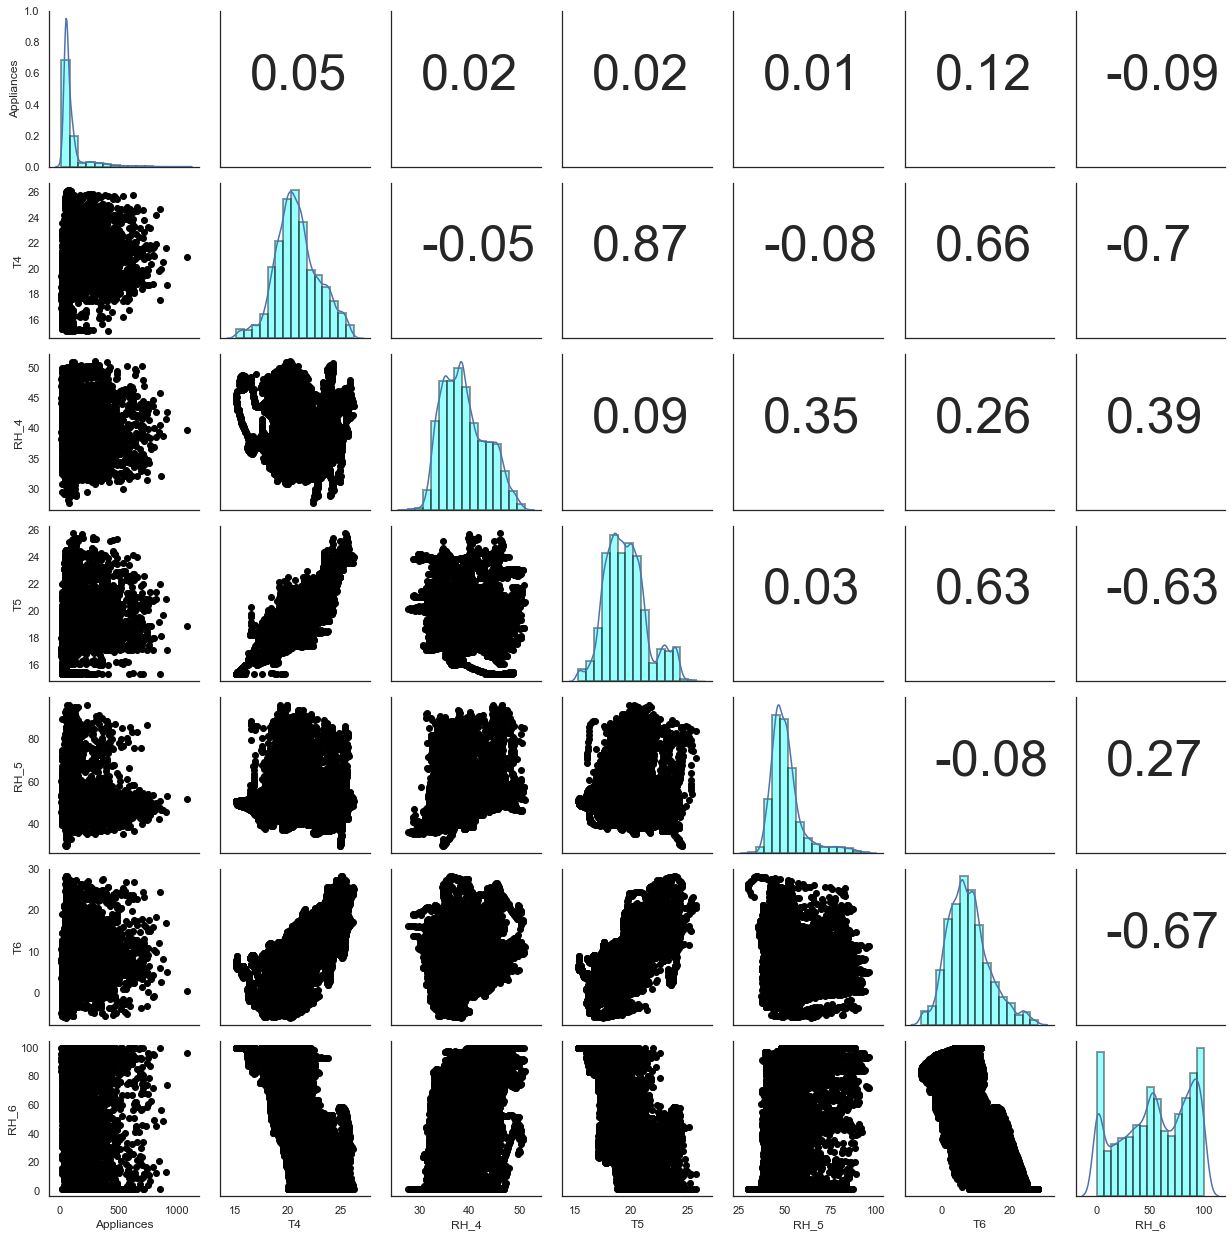

In [36]:
sns.set(style="white")
g = sns.PairGrid(test_dataset2, diag_sharey=False)
g = g.map_diag(sns.distplot, bins=15, hist=True,hist_kws={"linewidth": 2,"edgecolor":'black', "color" :'cyan'})
g = g.map_lower(plt.scatter,color = 'black')
g = g.map_upper(correlation)

In [37]:
#thirdpairsplot_train_set_Jan29
test_dataset3 =pd.DataFrame({'Appliances': train['Appliances'],
                             'T7': train['T7'], 'RH_7': train['RH_7'], 
                             'T8': train['T8'], 'RH_8': train['RH_8'], 
                             'T9': train['T9'], 'RH_9': train['RH_9']})

In [38]:
test_dataset3

,Appliances,T7,RH_7,T8,RH_8,T9,RH_9
0,60,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000
1,60,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000
2,50,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000
3,60,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000
4,50,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000
...,...,...,...,...,...,...,...
14798,110,24.500000,44.718000,24.600000,50.863333,23.200000,46.751429
14799,90,24.500000,44.764286,24.666667,50.445000,23.200000,46.745000
14800,90,24.557143,44.414286,24.700000,49.790000,23.200000,46.790000
14801,420,24.500000,44.295714,24.662500,49.518750,23.200000,46.817500


In [39]:
test_dataset3.corr()

,Appliances,T7,RH_7,T8,RH_8,T9,RH_9
Appliances,1.000000,0.032366,-0.056337,0.045568,-0.093609,0.016484,-0.050214
T7,0.032366,1.000000,-0.034084,0.882040,-0.211023,0.944363,-0.076143
RH_7,-0.056337,-0.034084,1.000000,-0.121006,0.885082,0.029148,0.858585
T8,0.045568,0.882040,-0.121006,1.000000,-0.208796,0.868642,-0.153882
RH_8,-0.093609,-0.211023,0.885082,-0.208796,1.000000,-0.114088,0.856012
T9,0.016484,0.944363,0.029148,0.868642,-0.114088,1.000000,-0.007294
RH_9,-0.050214,-0.076143,0.858585,-0.153882,0.856012,-0.007294,1.000000


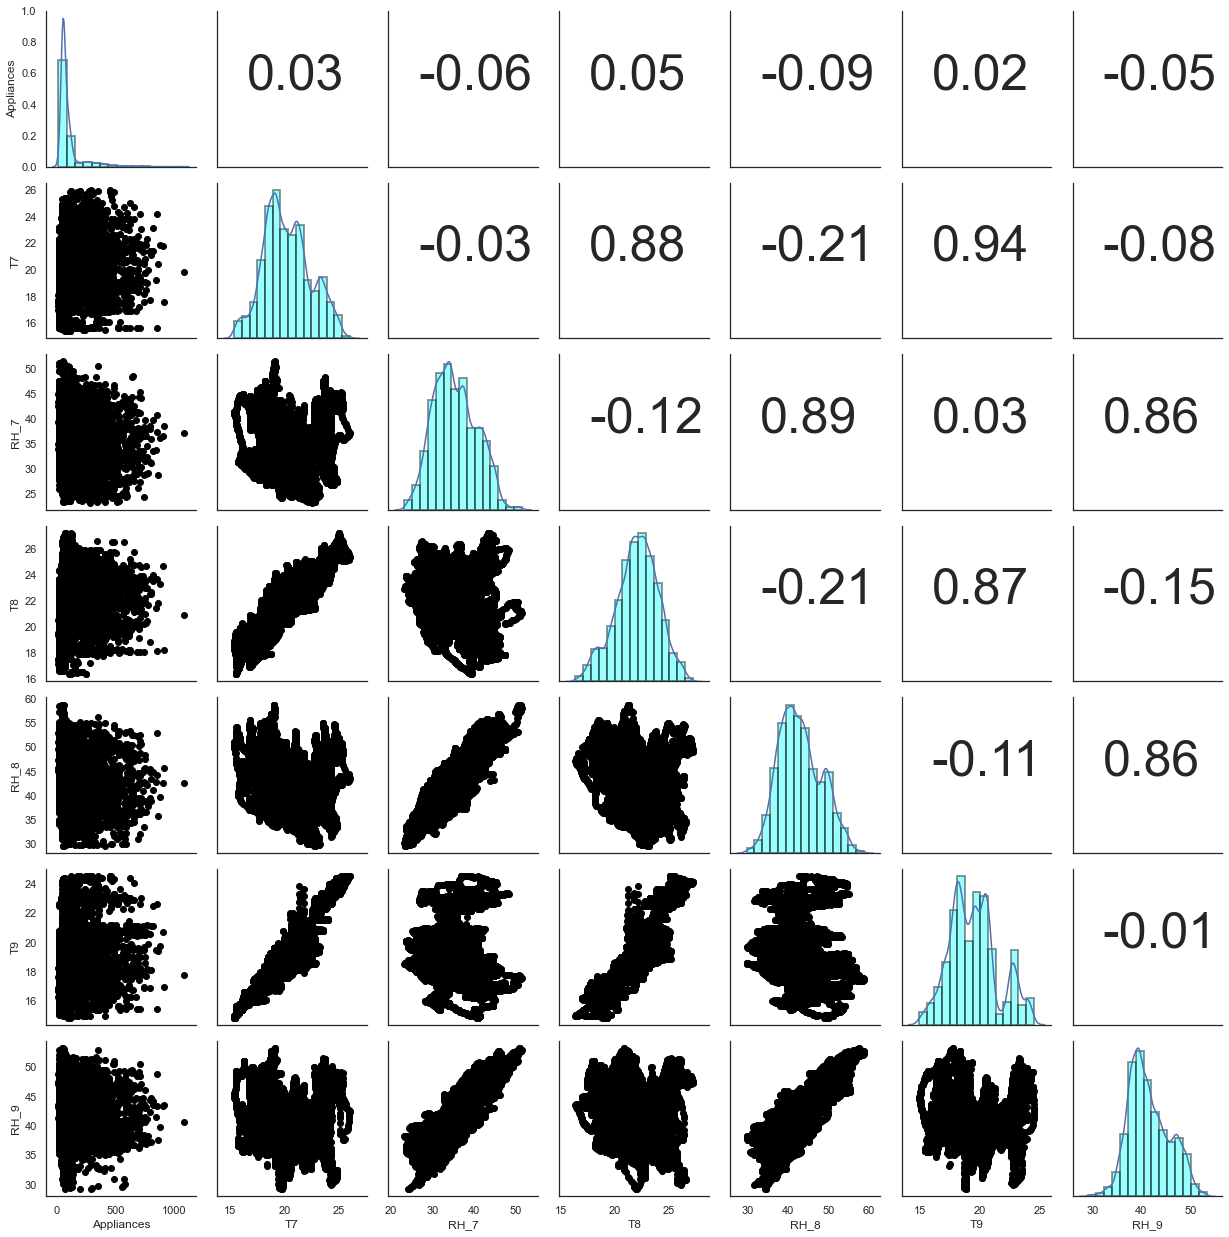

In [40]:
sns.set(style="white")
g = sns.PairGrid(test_dataset3, diag_sharey=False)
g = g.map_diag(sns.distplot, bins=15, hist=True,hist_kws={"linewidth": 2,"edgecolor":'black', "color" :'cyan'})
g = g.map_lower(plt.scatter,color = 'black')
g = g.map_upper(correlation)

In [41]:
#fourthpairsplot_train_set_Jan29
test_dataset4 =pd.DataFrame({'Appliances': train['Appliances'],
                             'T_out': train['T_out'], 'Press_mm_hg': train['Press_mm_hg'], 
                             'RH_out': train['RH_out'], 'Windspeed': train['Windspeed'], 
                             'Visibility': train['Visibility'], 'Tdewpoint': train['Tdewpoint'],
                              'NSM' :train['NSM'], 'T6': train['T6']})

In [42]:
test_dataset4

,Appliances,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,NSM,T6
0,60,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,61200,7.026667
1,60,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,61800,6.833333
2,50,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,62400,6.560000
3,60,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,63600,6.366667
4,50,6.016667,734.0,92.000000,5.333333,43.833333,4.800000,64200,6.300000
...,...,...,...,...,...,...,...,...,...
14798,110,23.000000,755.2,55.000000,3.000000,22.000000,13.400000,61200,25.963333
14799,90,22.866667,755.2,55.333333,3.166667,22.833333,13.366667,61800,25.630000
14800,90,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,63000,24.196667
14801,420,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,64200,22.433333


In [43]:
test_dataset4.corr()

,Appliances,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,NSM,T6
Appliances,1.000000,0.104490,-0.032222,-0.154931,0.085245,-0.004788,0.019597,0.216167,0.122450
T_out,0.104490,1.000000,-0.136687,-0.573954,0.193813,-0.077175,0.789472,0.221735,0.974850
Press_mm_hg,-0.032222,-0.136687,1.000000,-0.099391,-0.230534,0.041036,-0.241363,-0.004368,-0.134897
RH_out,-0.154931,-0.573954,-0.099391,1.000000,-0.174318,0.087339,0.038745,-0.344305,-0.568294
Windspeed,0.085245,0.193813,-0.230534,-0.174318,1.000000,-0.003981,0.127647,0.099591,0.168666
Visibility,-0.004788,-0.077175,0.041036,0.087339,-0.003981,1.000000,-0.039075,-0.027348,-0.082367
Tdewpoint,0.019597,0.789472,-0.241363,0.038745,0.127647,-0.039075,1.000000,0.028661,0.763588
NSM,0.216167,0.221735,-0.004368,-0.344305,0.099591,-0.027348,0.028661,1.000000,0.205039
T6,0.122450,0.974850,-0.134897,-0.568294,0.168666,-0.082367,0.763588,0.205039,1.000000


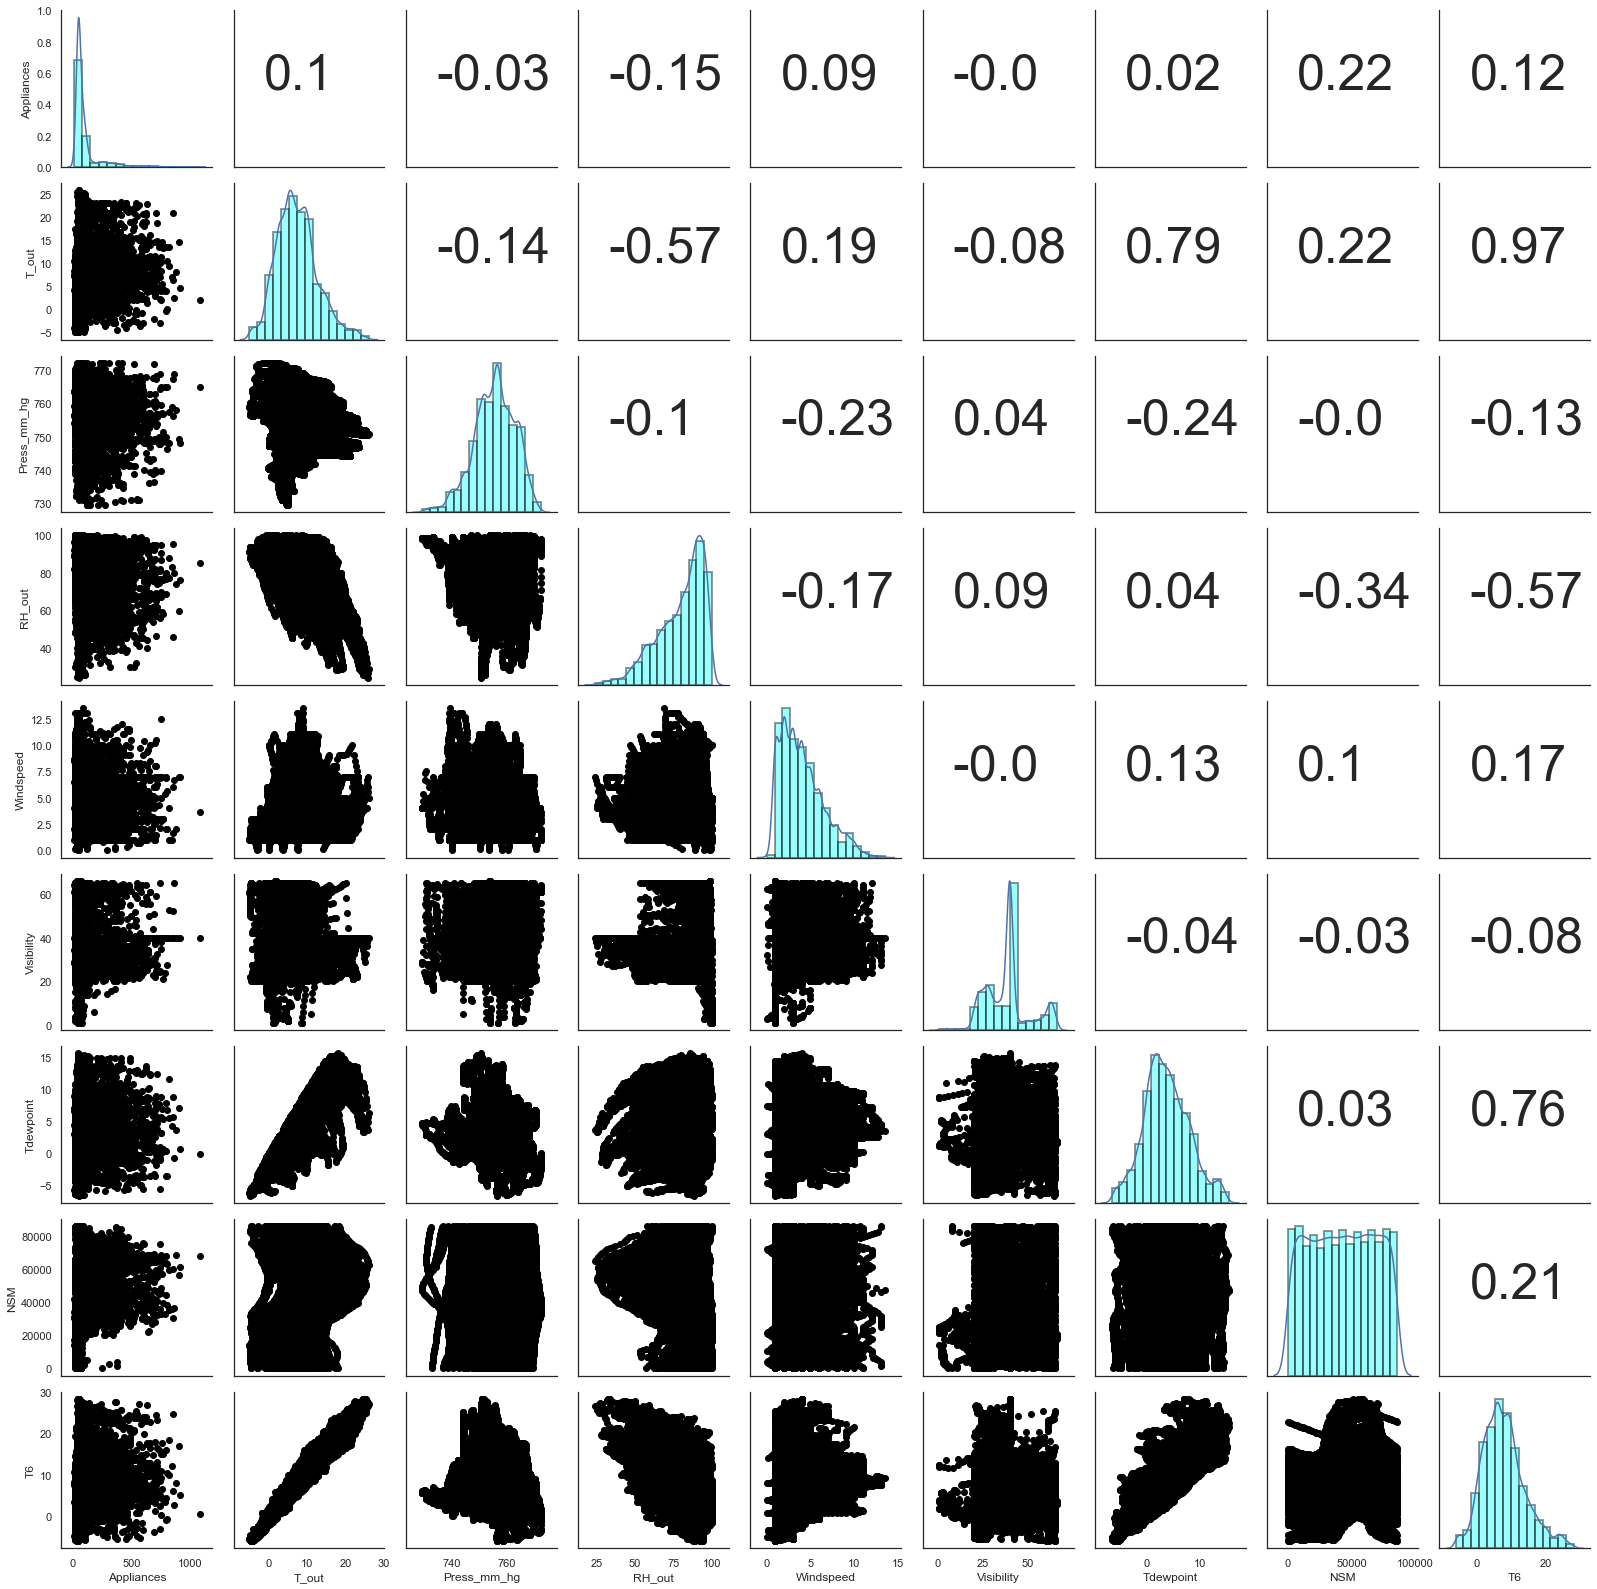

In [44]:
sns.set(style="white")
g = sns.PairGrid(test_dataset4, diag_sharey=False)
g = g.map_diag(sns.distplot, bins=15, hist=True,hist_kws={"linewidth": 2,"edgecolor":'black', "color" :'cyan'})
g = g.map_lower(plt.scatter,color = 'black')
g = g.map_upper(correlation)

In [45]:
Graph3.head()

,Appliances
date,
2016-01-11 17:30:00,50
2016-01-11 18:00:00,60
2016-01-11 18:40:00,230
2016-01-11 18:50:00,580
2016-01-11 19:30:00,100


In [46]:
Graph3['weekday'] = Graph3.index.weekday
Graph3.head(5)

,Appliances,weekday
date,,
2016-01-11 17:30:00,50,0
2016-01-11 18:00:00,60,0
2016-01-11 18:40:00,230,0
2016-01-11 18:50:00,580,0
2016-01-11 19:30:00,100,0


In [47]:
days = {0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
Graph3['day_of_week'] = Graph3['weekday'].apply(lambda x: days[x])
Graph3.head()

,Appliances,weekday,day_of_week
date,,,
2016-01-11 17:30:00,50,0,Mon
2016-01-11 18:00:00,60,0,Mon
2016-01-11 18:40:00,230,0,Mon
2016-01-11 18:50:00,580,0,Mon
2016-01-11 19:30:00,100,0,Mon


In [48]:
num = Graph3.select_dtypes('int64').columns
non_num = Graph3.columns.difference(num)
d = {**{x: 'sum' for x in num}, **{x: 'first' for x in non_num}}

#resample the data to get the sum of appliance usage for each hour of the day, while keeping the non-numerical data
Graph3 = Graph3.resample('H').agg(d)
Graph3.head()

,Appliances,weekday,day_of_week
date,,,
2016-01-11 17:00:00,330,0,Mon
2016-01-11 18:00:00,1060,0,Mon
2016-01-11 19:00:00,1040,0,Mon
2016-01-11 20:00:00,750,0,Mon
2016-01-11 21:00:00,620,0,Mon


In [49]:
Graph3['day_of_week'] = pd.Categorical(Graph3['day_of_week'], categories=
    ["Sun","Mon", "Tues", "Wed", "Thurs", "Fri","Sat"],
    ordered=True)

In [50]:
#Week 1 
df1 = Graph3['2016-01-17':'2016-01-23']
#Week 2
df2 = Graph3['2016-01-24':'2016-01-30']
#Week 3
df3 = Graph3['2016-01-31':'2016-02-06']
#Week 4
df4 = Graph3['2016-02-07':'2016-02-13']

In [51]:
df1 = pd.pivot_table(df1, index=df1.index.hour, columns=['day_of_week'], values="Appliances")
df1.head()

day_of_week,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
date,,,,,,,
0,280,270,280,220,250,240,260
1,310,260,270,270,330,220,190
2,260,260,200,190,250,230,210
3,300,250,280,260,300,240,230
4,310,270,200,250,240,220,180


In [52]:
df2 = pd.pivot_table(df2, index=df2.index.hour, columns=['day_of_week'], values="Appliances")
df2.head()

day_of_week,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
date,,,,,,,
0,210,290,1180,270,260,200,260
1,260,290,260,210,180,260,200
2,190,250,270,240,250,250,270
3,270,290,210,190,250,180,220
4,190,230,290,250,200,240,210


In [53]:
df3 = pd.pivot_table(df3, index=df3.index.hour, columns=['day_of_week'], values="Appliances")
df3.head()

day_of_week,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
date,,,,,,,
0,280,270,370,360,230,220,290
1,210,280,300,390,270,260,280
2,270,230,270,390,280,290,270
3,280,290,280,290,190,260,270
4,220,270,270,360,280,210,220


In [54]:
df4 = pd.pivot_table(df4, index=df4.index.hour, columns=['day_of_week'], values="Appliances")
df4.head()

day_of_week,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
date,,,,,,,
0,230,280,280,420,270,400,380
1,260,280,290,430,320,260,320
2,270,270,250,400,320,330,240
3,260,280,220,410,260,330,310
4,270,270,280,400,280,340,290


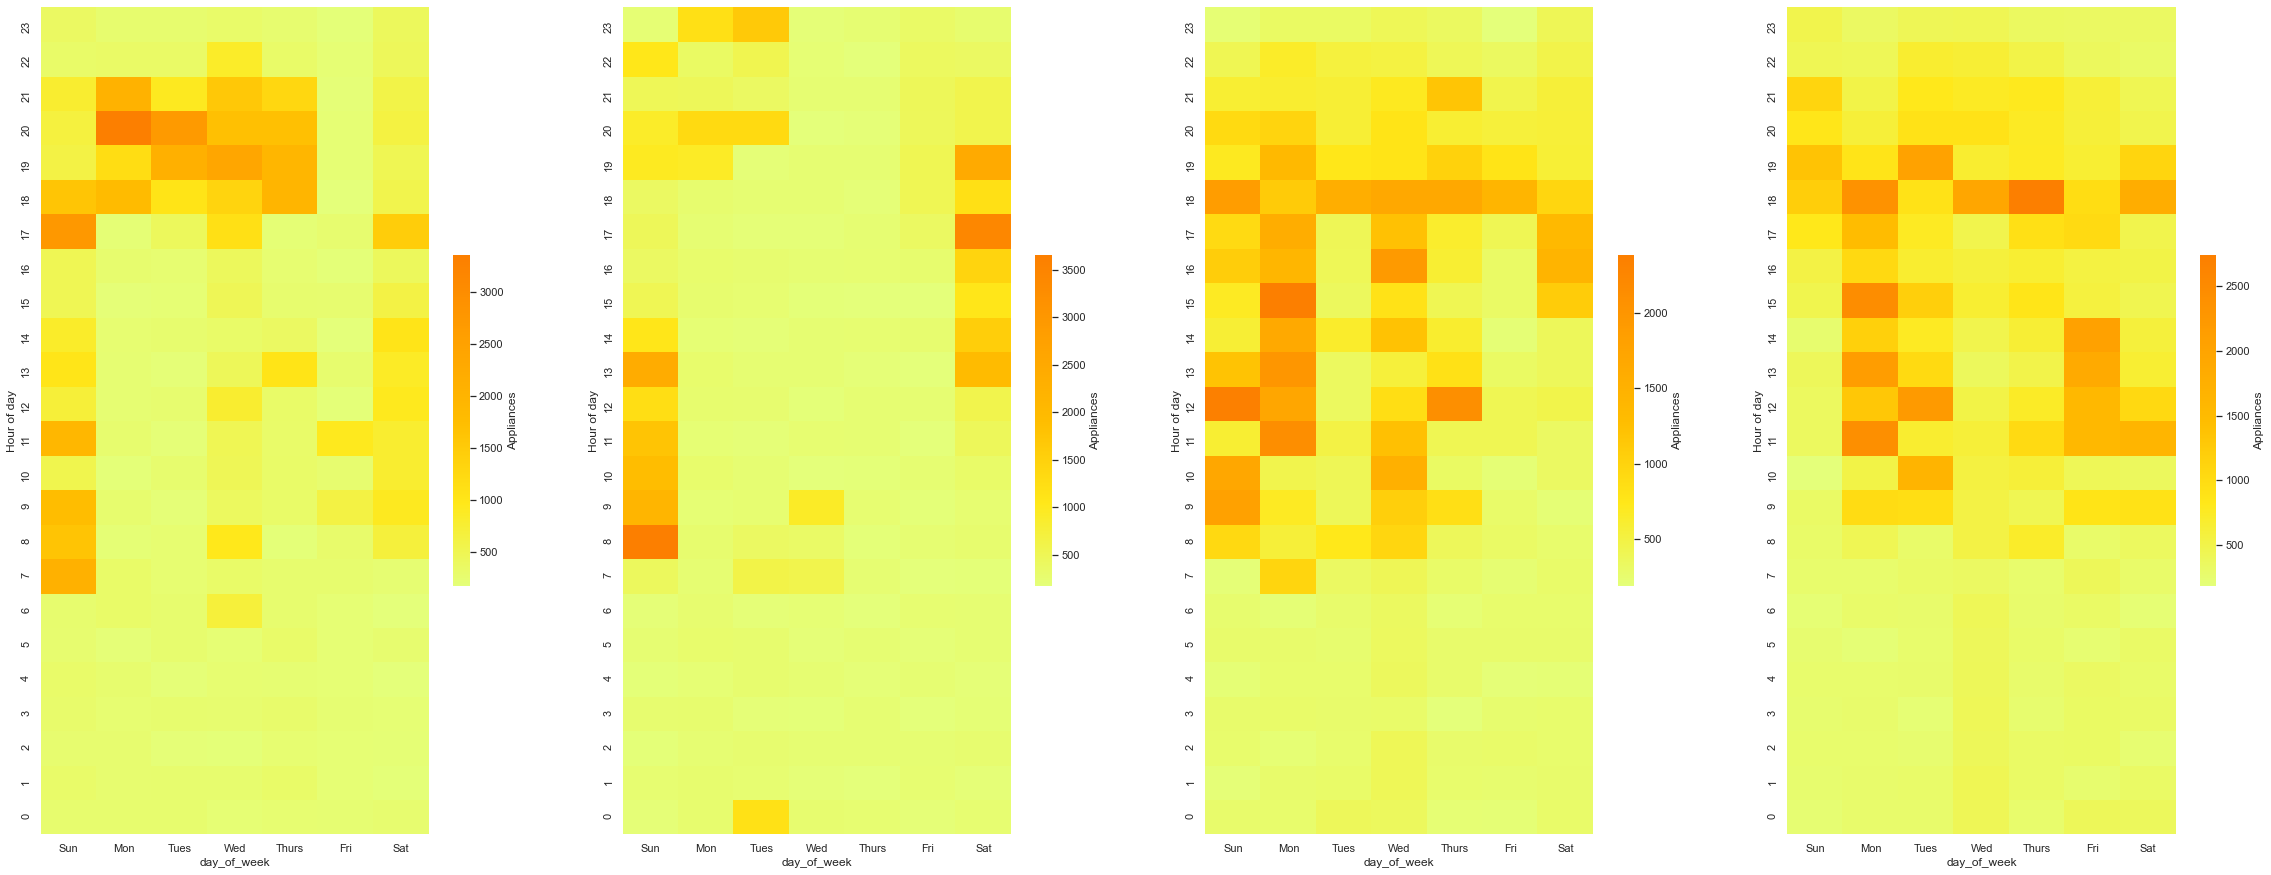

In [55]:
fig = plt.figure(figsize = (40,70))

ax1 = fig.add_subplot(4, 4, 1) # row, column, position (4 row, 4 col)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)

# Use ax parameter to indicate which subplot to use for each plot
sns.heatmap(df1, ax=ax1, cbar_kws={'label': 'Appliances','shrink': .4}, cmap="Wistia")
sns.heatmap(df2, ax=ax2, cbar_kws={'label': 'Appliances','shrink': .4}, cmap="Wistia")
sns.heatmap(df3, ax=ax3, cbar_kws={'label': 'Appliances','shrink': .4}, cmap="Wistia")
sns.heatmap(df4, ax=ax4, cbar_kws={'label': 'Appliances','shrink': .4}, cmap="Wistia")
ax1.set_ylabel('Hour of day')
ax1.invert_yaxis()
ax2.set_ylabel('Hour of day')
ax2.invert_yaxis()
ax3.set_ylabel('Hour of day')
ax3.invert_yaxis()
ax4.set_ylabel('Hour of day')
ax4.invert_yaxis()
sns.set(font_scale=1.8)

### Applying Linear regression

In [56]:
train.shape

(14803, 32)

In [57]:
test.shape

(4932, 31)

In [58]:
train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [135]:
x_train= train.drop(['Appliances','WeekStatus','date','Day_of_week' ], axis=1) 
y_train = train['Appliances']
print('Shape of X_train is:',x_train.shape )
print('Shape of Y_train is:',y_train.shape )

Shape of X_train is: (14803, 28)
Shape of Y_train is: (14803,)


In [136]:
x_test = test.drop(['Appliances','WeekStatus','date','Day_of_week'], axis=1)
y_test = test['Appliances']
print('Shape of X_test is:',x_test.shape )
print('Shape of Y_test is:',y_test.shape )

Shape of X_test is: (4932, 28)
Shape of Y_test is: (4932,)


#### Get-dummies function for each day of the week

In [137]:
days_in_week = train['Day_of_week']
day_week = pd.get_dummies(days_in_week)

day_week.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


#### Joining day_week values

In [138]:
x_train = train.join(day_week)
x_train.shape

(14803, 39)

In [139]:
x_train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [140]:
new_training = pd.DataFrame()
for col in x_train.columns:
    new_training[col] = x_train[col]
print(new_training.shape)

(14803, 39)


In [141]:
days_in_week_test = test['Day_of_week']
day_week_test = pd.get_dummies(days_in_week_test)

day_week_test.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [142]:
x_test = test.join(day_week_test)
x_test.shape

(4932, 39)

In [143]:
x_test.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [144]:
new_testing = pd.DataFrame()
for col in x_test.columns:
    new_testing[col] = x_test[col]
print(new_testing.shape)

(4932, 39)


#### Dropping non-numerical values

In [145]:
x_train = new_training.drop(['Appliances', 'WeekStatus','date', 'Day_of_week' ], axis=1) 
y_train = new_training['Appliances']

x_test = new_testing.drop(['Appliances','WeekStatus','date', 'Day_of_week'], axis=1)
y_test = new_testing['Appliances']

print('Shape of x_train_new :',x_train.shape )
print('Shape of y_train_new:',y_train.shape )
print('Shape of x_test_new:',x_test.shape )
print('Shape of y_test_new:',y_test.shape )

Shape of x_train_new : (14803, 35)
Shape of y_train_new: (14803,)
Shape of x_test_new: (4932, 35)
Shape of y_test_new: (4932,)


#### Train model on training dataset

In [146]:
Model = linear_model.LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

#### EVALUATION METRICS: training dataset

#### Calculating MSE score

In [147]:
y_train_predict = Model.predict(x_train)

mse= mean_squared_error(y_train, y_train_predict)
print("MSE score:", mse)

MSE score: 8687.278741530838


### Calculating r2 score

In [148]:
r2 = r2_score(y_train, y_train_predict)
print("R Squared Value:", r2)

R Squared Value: 0.17834376492372528


#### Calculating mean absolute error for training dataset

In [149]:
mae = mean_absolute_error(y_train, y_train_predict)
print("MAE score:", mae)

MAE score: 53.13891233505898


#### Calculating mean squared error

In [150]:
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
print("RMSE value:", rmse)

RMSE value: 93.20557248110671


#### EVALUATION METRICS: testing dataset

In [151]:
y_test_predict = Model.predict(x_test)

mse= mean_squared_error(y_test, y_test_predict)
print("MSE value:", mse)

MSE value: 8681.847902503243


In [152]:
r2 = r2_score(y_test, y_test_predict)
print("R Squared value:", r2)

R Squared value: 0.15900712778676718


In [153]:
mae = mean_absolute_error(y_test, y_test_predict)
print("MAE value:", mae)

MAE value: 51.98492960938579


In [154]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("RMSE value:", rmse)

RMSE value: 93.17643426587671


### Observation : As exhibited in the paper, the model is prediciting better on the training data set than the test set.

#### Feature selection

In [155]:
model = LinearRegression()
z = StratifiedKFold(n_splits=10, random_state=42)
rfecv_selector = RFECV(estimator=model, step=1, cv=z, scoring='neg_mean_squared_error')
rfecv_selector = rfecv_selector.fit(x_train, y_train)
print('Optimal number of features in above model:', rfecv_selector.n_features_)
print('Above model with best features :', x_train.columns[rfecv_selector.support_])

Optimal number of features in above model: 23
Above model with best features : Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'T_out', 'Windspeed', 'Tdewpoint', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


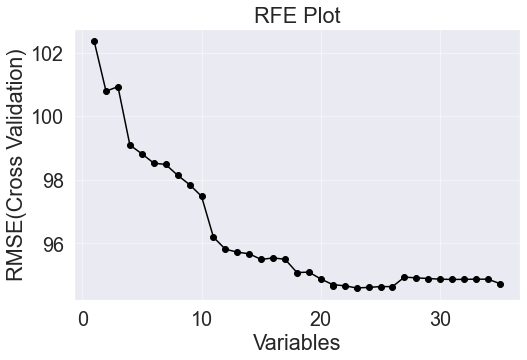

In [156]:
plt.figure(figsize=(8,5))
plt.xlabel("Variables")
plt.ylabel("RMSE(Cross Validation)")
plt.title('RFE Plot')

rmse = np.sqrt(-rfecv_selector.grid_scores_)

p = plt.plot(range(1, len(rfecv_selector.grid_scores_) + 1),rmse, marker='o',color='black')
plt.grid(alpha=0.5)

xvals = p[0].get_xdata()
yvals = p[0].get_ydata()
plt.plot(xvals[20],yvals[21], marker="o", color='black')
plt.show()

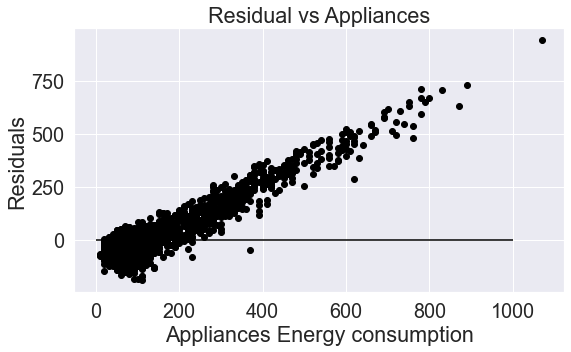

In [157]:
resids = y_test - y_test_predict
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
#plt.Circle((0, 0), .5)
plt.scatter(x=y_test, y=resids,color='black')
plt.hlines(y=0, xmin=0, xmax=1000, color='black')
plt.title('Residual vs Appliances')
plt.ylabel('Residuals')
plt.xlabel('Appliances Energy consumption')

plt.tight_layout()
plt.show()

### Conclusion

Energy consumption of appliances distribution - over the total period is represented by Box plot and Histogram.

Pair plots with the energy utilization factors of Appliances with lights, T1, RH1, T2, RH2, T3, RH3. T1 and RH1 shows a positive relationship between's the energy utilization of machines and lights (0.19). The second biggest connection is among machines and T2. 

Heatmap for 4 successive weeks can be unquestionably seen, there is a strong time portion in the energy usage plan. The energy use starts to ascend around 6 AM. By then around early evening, there are energy load floods. The energy demand furthermore increases around 6 pm. There is no unmistakable model concerning the day of the week 

Contrasting with the appended paper : Results are basically the same as those found in the paper (RMSE: 93.18 and R^2: 0.16). There is no such contrast that can be put down to this paper which would have diffrentiate multicollinearity between the independant factors. 

The subsequent measurements from the straight model show a high MSE. This is the normal of the squared contrast between the anticipated and real perceptions. We need this to be pretty much as low as conceivable since more modest mistakes mean more exactness.